In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data

In [56]:
df = pd.read_csv("injury-details-2024-q2.csv")
df.head()

,Date,Route,Operator,Borough,Garage,Incident type,Injury outcome,Victim category,Age,Gender,Injury,ID
0,2014-01-01,430,Go-Ahead,Wandsworth,Putney,Slip Trip Fall,Taken to hospital,Passenger / customer,Adult (18-65),Male,Yes,39727.0
1,2014-01-01,N35,Transport UK,Southwark,Walworth,Slip Trip Fall,Other,Passenger / customer,Adult (18-65),Female,Yes,39730.0
2,2014-01-01,7,Metroline,Westminster,West Perivale,Slip Trip Fall,Refused treatment,Passenger / customer,Adult (18-65),Female,Yes,39735.0
3,2014-01-01,9,RATP,Kensington & Chelsea,Stamford Brook,Slip Trip Fall,Refused treatment,Passenger / customer,Child (0-12),Unknown,Yes,39740.0
4,2014-01-01,217,Metroline,Broxbourne,Potters Bar,Collision,Taken to hospital,Pedestrian,Adult (18-65),Male,Yes,39741.0


# Data Cleaning

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69619 entries, 0 to 69618
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             69619 non-null  datetime64[ns]
 1   Route            65622 non-null  object        
 2   Operator         69619 non-null  object        
 3   Borough          69258 non-null  object        
 4   Garage           69619 non-null  object        
 5   Incident type    69619 non-null  object        
 6   Injury outcome   69619 non-null  object        
 7   Victim category  69619 non-null  object        
 8   Age              69619 non-null  object        
 9   Gender           69619 non-null  object        
 10  Injury           69619 non-null  object        
 11  ID               69595 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 6.4+ MB


In [58]:
df.drop_duplicates(inplace=True)

# Data Analysis

### Questions to answer:
1. What year have the most incidents?
2. Which months have the most incidents?
3. Does the borough have an effect on the frequency of collision incidents?
4. Which bus operator have the most fatal incidents?

## 1. What year have the most incidents?

In [59]:
print(f"Minimum Date: {df['Date'].min()} Maximum Date:{df['Date'].max()}")

Minimum Date: 2014-01-01 00:00:00 Maximum Date:2024-06-30 00:00:00


In [60]:
gp_year = df.groupby(df['Date'].dt.year).size().reset_index(name='count')
gp_year =gp_year[gp_year['Date']< 2024] #excluding 2024 because not full year
print(gp_year)

   Date  count
0  2014   6548
1  2015   6559
2  2016   6674
3  2017   7352
4  2018   6702
5  2019   6007
6  2020   4197
7  2021   5589
8  2022   7790
9  2023   8152


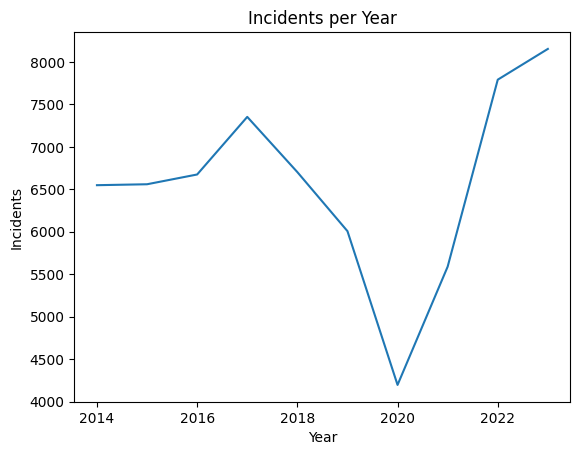

In [61]:
sns.lineplot(data=gp_year, x='Date',y='count')
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.title('Incidents per Year')
plt.savefig('images/Incidents per Year.png')

### The year with the most incidents is 2023, with the least being 2020. The steep decline and increase might be caused by the COVID-19 pandemic.

## 2. Which months have the most incidents?

In [62]:
sort_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

def custom_sort(cat):
    return sort_month.index(cat)

gp_month = df.groupby(df[df['Date'].dt.year < 2024]['Date'].dt.strftime('%b')).size().reset_index(name='count').sort_values('Date',key = lambda x: x.map(custom_sort))
print(gp_month)

   Date  count
4   Jan   4799
3   Feb   4835
7   Mar   5441
0   Apr   5043
8   May   5362
6   Jun   5709
5   Jul   6085
1   Aug   5584
11  Sep   5848
10  Oct   6060
9   Nov   5672
2   Dec   5132


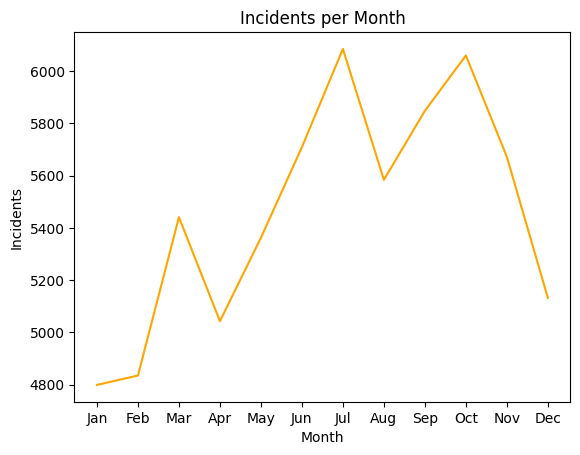

In [63]:
sns.lineplot(data=gp_month,x='Date',y='count',color='orange')
plt.title("Incidents per Month")
plt.xlabel("Month")
plt.ylabel("Incidents")
plt.savefig('images/Incidents per Month.png')

### July has the most incidents, while January has the least incidents.

## 3. Does the borough have an effect on the frequency of collision incidents?

In [64]:
df['Incident type'].unique()

array(['Slip Trip Fall', 'Collision', 'Vandalism / Hooliganism',
       'Medical Incident', 'Activity Incident Event', 'Assault',
       'Personal Injury Event', 'Fire', 'Near Miss Incident',
       'Safety Critical Failure', 'Robbery', 'Environmental Incident'],
      dtype=object)

In [65]:
filter_df = df[df['Incident type'] == 'Collision']
gp_collision = filter_df.groupby(['Borough'])['Date'].count().reset_index(name='count').sort_values('count',ascending=False).nlargest(10,columns='count')
print(gp_collision)

        Borough  count
61  Westminster    675
37      Lambeth    603
50    Southwark    553
10      Croydon    471
38     Lewisham    428
59   Wandsworth    388
18    Greenwich    379
41       Newham    357
1        Barnet    344
19      Hackney    316


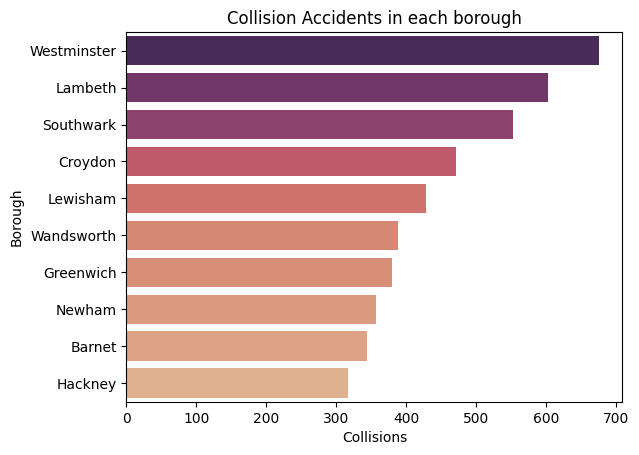

In [66]:
sns.barplot(data=gp_collision,x='count',y='Borough',palette='flare',hue='count',legend=False)
plt.title("Collision Accidents in each borough")
plt.ylabel("Borough")
plt.xlabel("Collisions")
plt.savefig('images/Collision.png',bbox_inches='tight')

### Some boroughs does have more collision accidents than others. Westminster have the most collisions.

## 4. Which bus operator have the most fatal incidents? 

In [67]:
df["Injury outcome"].unique()

array(['Taken to hospital', 'Other', 'Refused treatment', 'First aid',
       'Fatal', 'No treatment offered or required'], dtype=object)

In [68]:
gp = df.groupby('Injury outcome').size()
print(gp)

Injury outcome
Fatal                                 183
First aid                            8099
No treatment offered or required    28520
Other                                1749
Refused treatment                   17341
Taken to hospital                   13727
dtype: int64


In [69]:
serious_df = df[df['Injury outcome'].str.contains('Fatal')]

operator_gp = serious_df.groupby('Operator')['Operator'].count().reset_index(name='count').nlargest(10,'count')
print(operator_gp)

        Operator  count
2       Go-Ahead     46
3      Metroline     34
0  Arriva London     30
5     Stagecoach     28
4           RATP     22
7   Transport UK     11
6  Tower Transit      8
1          Buses      4


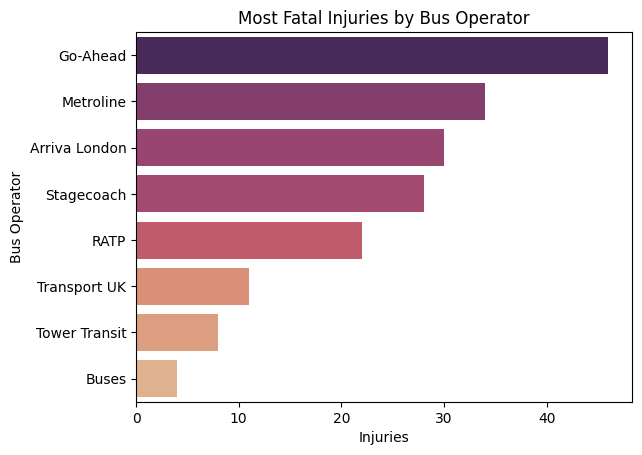

In [70]:
sns.barplot(data=operator_gp,x='count',y='Operator',palette='flare',hue='count',legend=False)
plt.title("Most Fatal Injuries by Bus Operator")
plt.ylabel('Bus Operator')
plt.xlabel("Injuries")
plt.savefig('images/Fatal Injuries.png',bbox_inches='tight')

### The top 3 bus operators with most fatal injuries is Go-Ahead, Metroline, Arriva London.